In [1]:
import rvsearch
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# change this to the most updated data
data = pd.read_csv('../Radvel_MCMC/CK00367_default_data.csv')

# known planet posterior
planetb_post = pickle.load( open( "../Radvel_MCMC/1PlanetNoLinearResults/1PlanetNoLinearResults_post_obj.pkl", "rb" ) )

In [3]:
planetb_post

parameter                     value       +/-      vary
per1                        31.5786     2e-07      True
tc1                         13.7055      0.18      True
secosw1                    0.579612     0.068      True
sesinw1                    0.689891     0.051      True
k1                          16.4299       1.7      True
dvdt                              0         0     False
curv                              0         0     False
gamma_j                   0.0188342      0.46      True
jit_j                       3.83881      0.36      True
tp1                         13.4759      0.19          
e1                           0.8119     0.021          
w1                         0.872048     0.094          

Priors
------
e1 constrained to be < 0.99
K constrained to be > 0
Bounded prior on jit_j, min=0.0, max=10.0
Gaussian prior on per1, mu=31.5786452580379, sigma=2e-07
Gaussian prior on tc1, mu=2457820.706751, sigma=0.5
Numerical prior on ['secosw1', 'sesinw1']

In [4]:
planet_search = rvsearch.search.Search(data, 
                       post=None, 
                       starname='rvsearch_P100', 
                       max_planets=1, 
                       priors=[], # should I add priors?
                       crit='bic', 
                       fap=0.0001, 
                       min_per=100, # make this 100 
                       max_per=3000, 
                       manual_grid=None, 
                       oversampling=10.0, 
                       trend=False, 
                       linear=False, # not sure what this does, but this is the default
                       eccentric=False, # allow for eccentricity to float 
                       fix=False, # fix inner planet parameters 
                       polish=False, 
                       baseline=True, 
                       mcmc=False, 
                       workers=1, 
                       verbose=True, 
                       save_outputs=True,
                       mstar=(1.03,0.04))

  0%|          | 3/1044 [00:00<00:40, 25.81it/s]

Number of test periods: 1044
Calculating BIC periodogram for 1 planets vs. 0 planets


100%|██████████| 1044/1044 [00:39<00:00, 26.44it/s]


RV multi-panel plot saved to /Users/isabelangelo/Desktop/SubSaturnSimulation/Radvel_RVsearch/rvsearch_P100/orbit_plot0.pdf


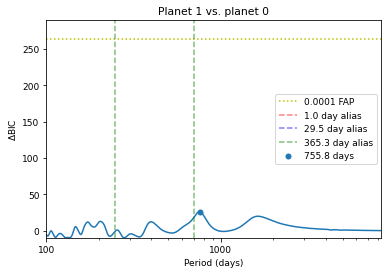

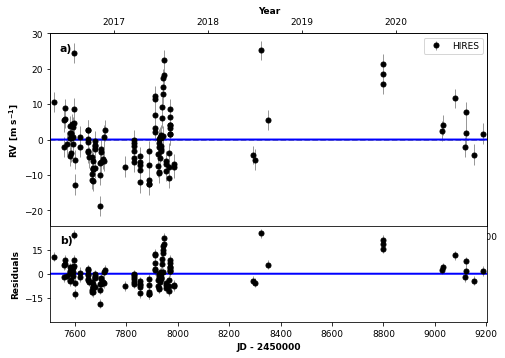

In [5]:
planet_search.run_search()

In [6]:
# now plot the periodogram data yourself!

# change this line
p = pd.read_csv('rvsearch_P100/pers_periodograms.csv',sep=' ')

# store data
periods = np.array(p['#'])
dbics = np.array(p['period'])

# find top 3 peaks, change threshold until you have 3
threshold = 10
peak_pers = [];peak_dbics = []
for i in range(len(periods))[2:-2]:
    per = periods[i]
    dbic = dbics[i]
    if (dbic>dbics[i+1]) & (dbic>dbics[i-1]):
        if dbic>threshold:
            print(dbic)
            peak_pers.append(per)
            peak_dbics.append(dbic)

11.942644768141463
12.860603566548548
12.25132750312184
26.280600726166533
19.895003053913452


(100, 10000.0)

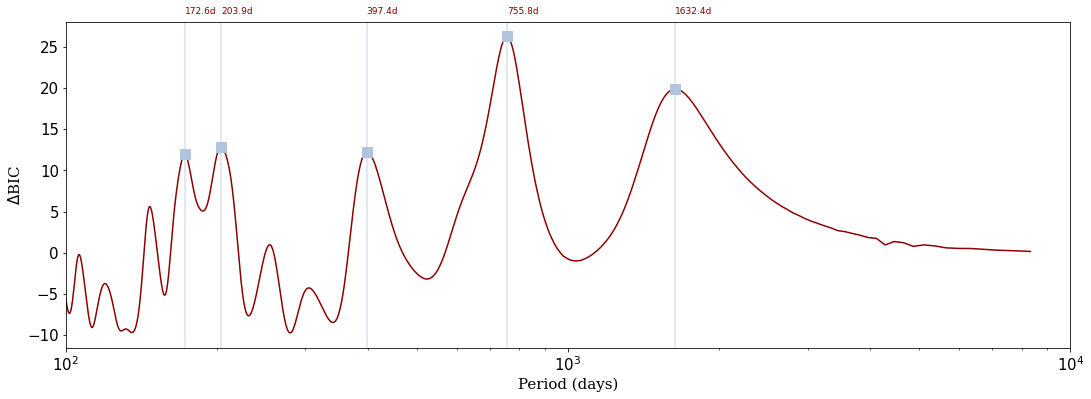

In [7]:
plt.figure(figsize=(18,6))

plt.plot(periods,dbics,color='darkred')
plt.plot(peak_pers,peak_dbics,'s',markersize=10,color='lightsteelblue')

for i in range(len(peak_pers)):
    plt.axvline(x=peak_pers[i],alpha=0.5,color='lightsteelblue')
    label = str(np.round(peak_pers[i],decimals=1)) + 'd'
    plt.text(peak_pers[i], 29, label,color='darkred')

plt.xlabel('Period (days)', fontsize=15,family='serif')
plt.ylabel('$\Delta$BIC', fontsize=15,family='serif')
plt.xscale('log')
plt.xticks(fontsize=15);plt.yticks(fontsize=15)

plt.xlim(100,1e4)

In [8]:
peak_pers

[172.58840241164975,
 203.92762193092543,
 397.36367190598605,
 755.8411836611283,
 1632.4435853734917]